In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
titanic_df = pd.read_csv('train.csv')
# analysing the titanic deaths information 


In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
titanic_df.info()
# gives you the infromation on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# qestions we are looking
# what are we trying to achieve
# who are the passengers 
# hwat desk are in the class and how is that related to class
# what cities
# any families
# gender of passenger 
# what factors helps somone sinkinmg of titanic

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

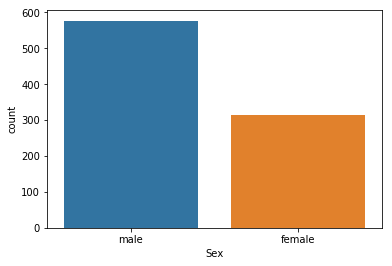

In [26]:
# who are the passengers on the titanic
sns.countplot('Sex',data = titanic_df)
# countplot will give you the count of 1:1

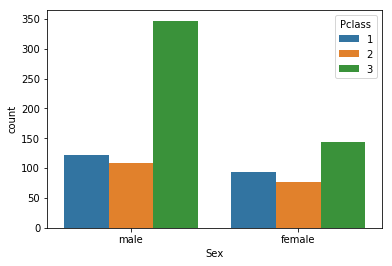

In [27]:
sns.countplot('Sex',data = titanic_df,hue='Pclass')
# looking at each and every details on the clsses of both male and fermale
# passengers in the ship

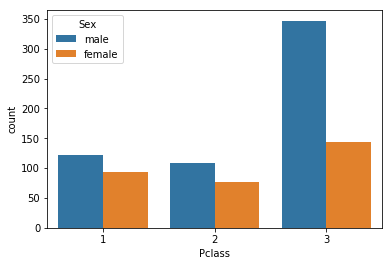

In [29]:
sns.countplot('Pclass', data = titanic_df, hue='Sex')
# looking at the count of male and female in each class

In [37]:

# function checks for male and female and if age less than 16 will be considered child
def male_female_child(passenger):
    age, sex = passenger
    if (age<16):
        return 'child'
    else:
        return sex

In [31]:
# we can apply functions to segregate data more efficiently 
# created a new column called Person

In [38]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis =1)

In [42]:
titanic_df[1:10]
# new column is added that specifies a person is elder or child

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


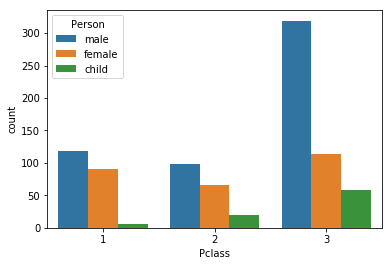

In [44]:
sns.countplot('Pclass',data = titanic_df, hue = 'Person')

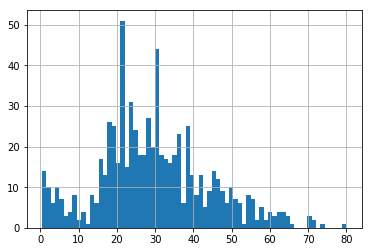

In [46]:
titanic_df['Age'].hist(bins = 70)
# histograms of ages of people in the ship

In [48]:
#average age in the ship is 29.699
titanic_df['Age'].mean()

29.69911764705882

In [50]:
titanic_df['Person'].value_counts()
# will give a count of each and every sex in the ship 

male      537
female    271
child      83
Name: Person, dtype: int64

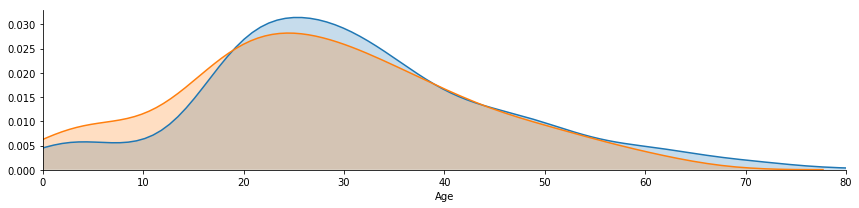

In [58]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect =4)
fig.map(sns.kdeplot,'Age', shade=True)
oldest= titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

# created a figure wuth hue as sex and aspect to 4 whoch will stretch the pictutre for better view
# we have mapped the kde plots using age and shaded the area 
# we have created a e=variable which will tell you the maximum age o=in th elist
# and we have set the x limit to the max age 

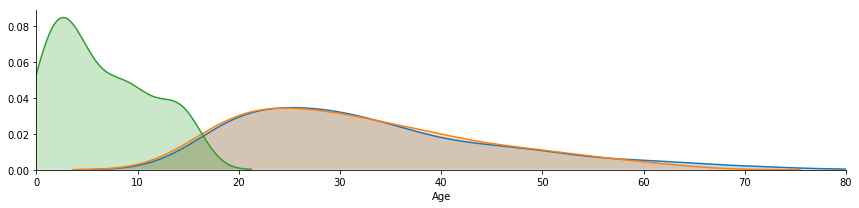

In [59]:
fig = sns.FacetGrid(titanic_df, hue='Person', aspect =4)
fig.map(sns.kdeplot,'Age', shade=True)
oldest= titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

In [60]:
# this is the same as the oid onw but here the plot is based on the Person

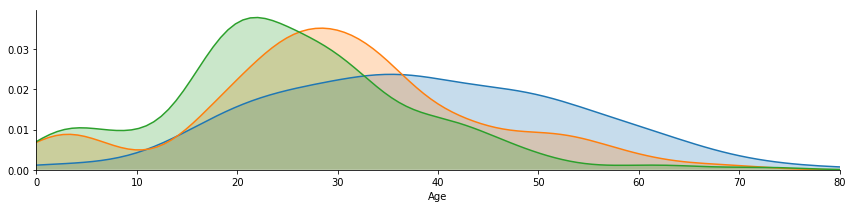

In [61]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect =4)
fig.map(sns.kdeplot,'Age', shade=True)
oldest= titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
# this is a plot for class 

In [63]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [65]:
deck = titanic_df['Cabin'].dropna()
# this will drop all the null values in the titanic dataframe and c anin column

In [66]:
deck

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
751           E121
759            B77
763        B96 B98
765            D11
772            E77
776            F38
779             B3
781            B20
782             D6
789        B82 B84
796            D17
802        B96 B98
806            A36
809             E8
815           B102
820            B69
823           E121
829            B28
835            E49
839            C47
849            C92
853         

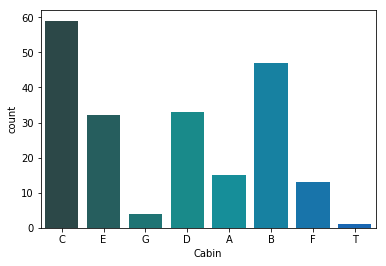

In [74]:
levels=[]

for level in deck :
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df, palette = 'winter_d')
# palette is the color map we can choose what ever color we want

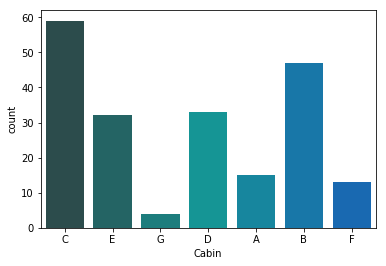

In [73]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin',data=cabin_df, palette = 'winter_d')

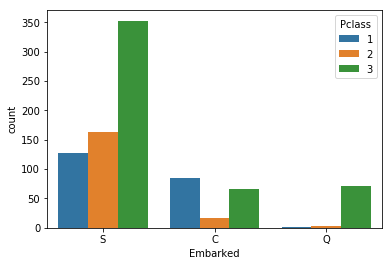

In [79]:
sns.countplot('Embarked', data = titanic_df, hue = 'Pclass')
# we can change the order the data displays by using X_Order

In [80]:
# who is alone and who is with Family 

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [99]:
def parch_sibsp(passenger):
    sibsp,parch = passenger
    if sibsp == 0 and parch ==0:
        return 'Alone'
    else :
        return 'With Family'

In [100]:
titanic_df['Alone'] = titanic_df[['SibSp','Parch']].apply(parch_sibsp, axis =1)

# will determine if there is any other direct family member in the boat
# no is there is  a familuy member 
# yes is no family member 

In [101]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family


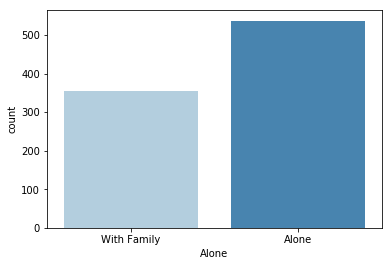

In [102]:
sns.countplot('Alone',data= titanic_df, palette='Blues')

In [103]:
# what factors help someone survive

In [107]:
titanic_df['Surviver'] = titanic_df.Survived.map({0:'no',1:'yes'})

In [108]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,surviver,Surviver
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,no


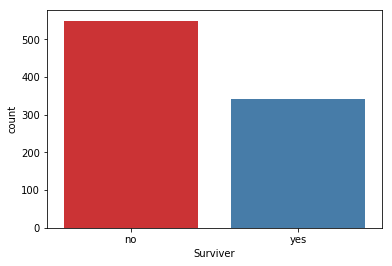

In [110]:
sns.countplot('Surviver', data = titanic_df, palette = 'Set1')

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


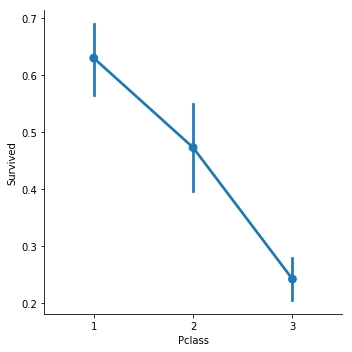

In [114]:
sns.factorplot('Pclass','Survived',data= titanic_df)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


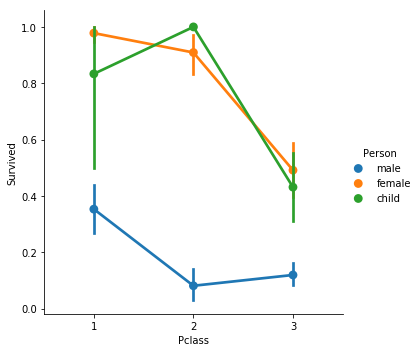

In [115]:
sns.factorplot('Pclass','Survived',hue = 'Person',data= titanic_df)

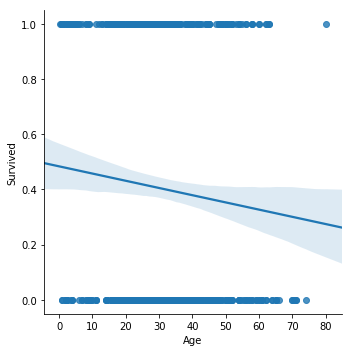

In [117]:
sns.lmplot('Age', 'Survived',data= titanic_df)

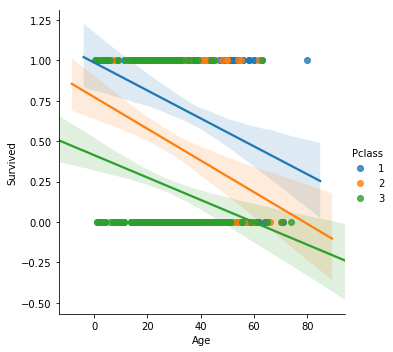

In [118]:
sns.lmplot('Age', 'Survived',hue = 'Pclass',data= titanic_df)

In [124]:
generations=[10,20,40,60,80]

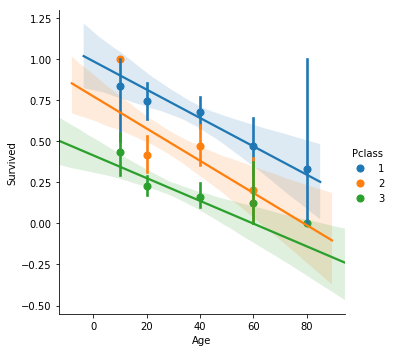

In [126]:
sns.lmplot('Age','Survived', hue= 'Pclass', data = titanic_df,x_bins = generations)

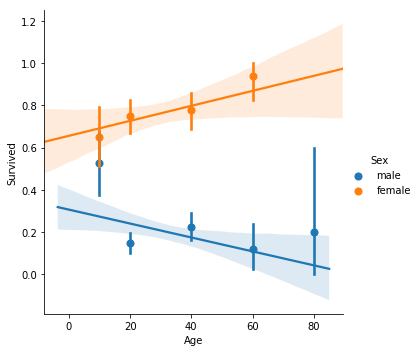

In [128]:
sns.lmplot('Age','Survived', hue ='Sex',data = titanic_df,x_bins= generations)